In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_context("talk")

print("ReelSense EDA environment ready")


ReelSense EDA environment ready


In [2]:
ratings = pd.read_csv("../data/raw/ratings.csv")
movies = pd.read_csv("../data/raw/movies.csv")
tags = pd.read_csv("../data/raw/tags.csv")
links = pd.read_csv("../data/raw/links.csv")

ratings.head()


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
print("Ratings:", ratings.shape)
print("Movies:", movies.shape)
print("Tags:", tags.shape)

ratings.describe()


Ratings: (100836, 4)
Movies: (9742, 3)
Tags: (3683, 4)


,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


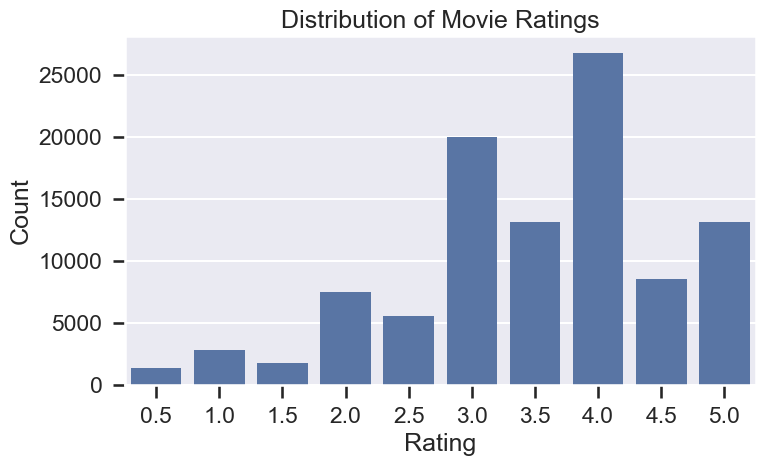

In [4]:
plt.figure(figsize=(8,5))
sns.countplot(x="rating", data=ratings)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



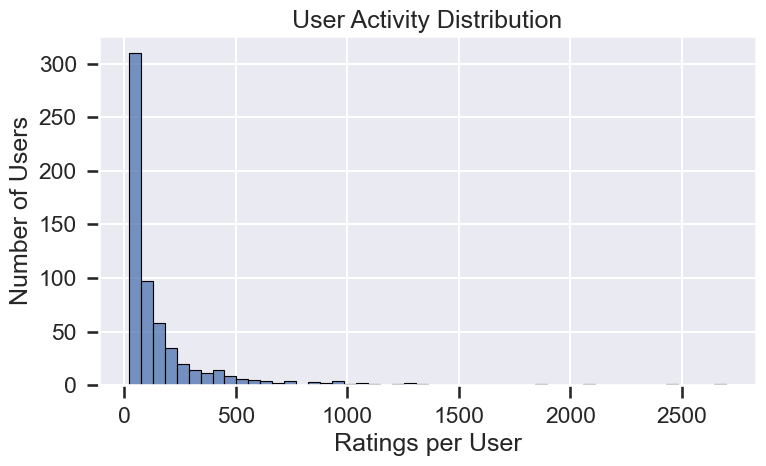

<Figure size 800x550 with 0 Axes>

In [7]:
user_activity = ratings.groupby("userId").size()

plt.figure(figsize=(8,5))
sns.histplot(user_activity, bins=50)
plt.title("User Activity Distribution")
plt.xlabel("Ratings per User")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()
plt.savefig("../results/plots/useractivity_distribution.png")

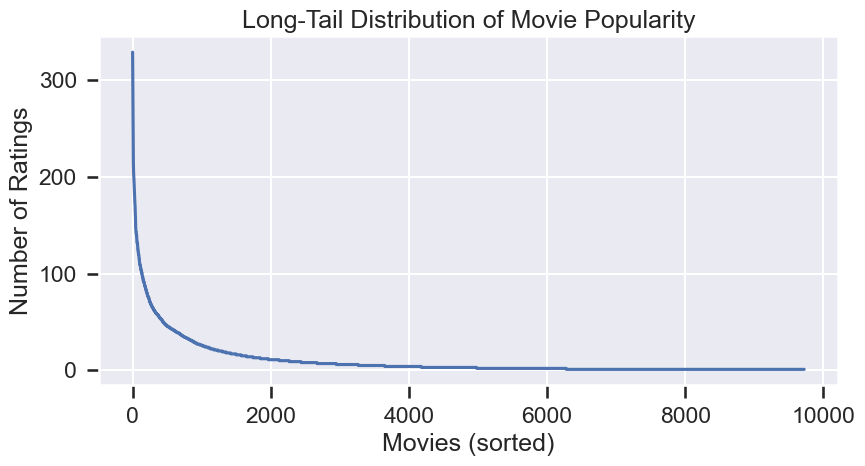

<Figure size 800x550 with 0 Axes>

In [8]:
movie_popularity = ratings.groupby("movieId").size().sort_values(ascending=False)

plt.figure(figsize=(9,5))
plt.plot(movie_popularity.values)
plt.title("Long-Tail Distribution of Movie Popularity")
plt.xlabel("Movies (sorted)")
plt.ylabel("Number of Ratings")
plt.tight_layout()
plt.show()
plt.savefig("../results/plots/longtail_distribution.png")

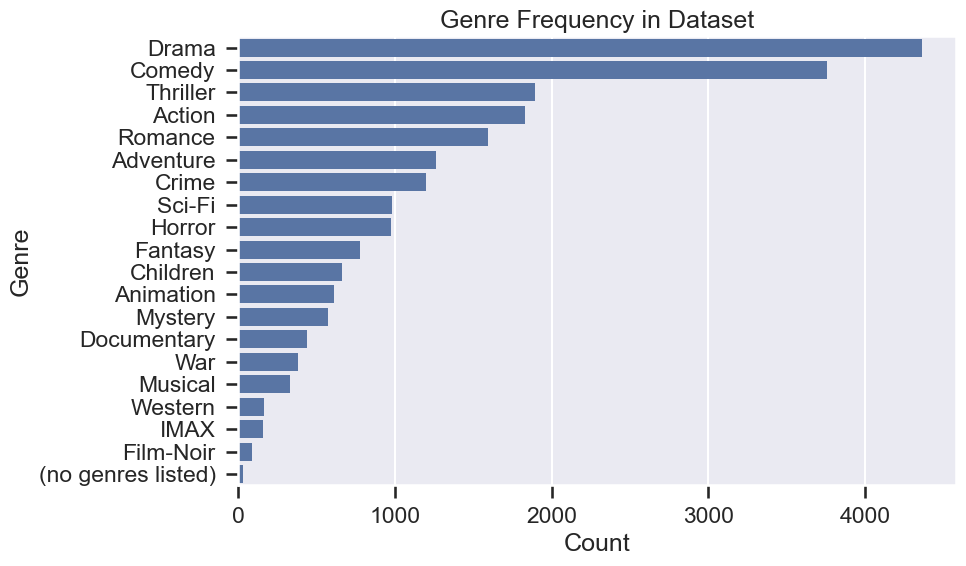

<Figure size 800x550 with 0 Axes>

In [9]:
genres = movies["genres"].str.split("|", expand=True)
genre_counts = genres.stack().value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title("Genre Frequency in Dataset")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()
plt.savefig("../results/plots/genre_frequency.png")

The long-tail distribution shows that a small number of movies receive the majority of ratings, motivating the need for diversity-aware recommendation strategies to reduce popularity bias.